In [1]:
# only for cuda enabled laptop and desktop

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [4]:
import pathlib
data_dir = tf.keras.utils.get_file('horse_or_human',"https://storage.googleapis.com/learning-datasets/horse-or-human.zip")

In [5]:
data_dir

'C:\\Users\\HP\\.keras\\datasets\\horse_or_human'

In [6]:
import os
import zipfile #to handle zip file

local_zip = 'C:\\Users\\HP\\.keras\\datasets\\horse_or_human'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse_or_human')
zip_ref.close()

In [7]:
os.listdir('horse_or_human')

['horses', 'humans']

In [8]:
os.listdir('horse_or_human/horses')

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [9]:
os.listdir('horse_or_human/humans')

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png',
 'human01-10.png',
 'human01-11.png',
 'human01-12.png',
 'human01-13.png',
 'human01-14.png',
 'human01-15.png',
 'human01-16.png',
 'human01-17.png',
 'human01-18.png',
 'human01-19.png',
 'human01-20.png',
 'human01-21.png',
 'human01-22.png',
 'human01-23.png',
 'human01-24.png',
 'human01-25.png',
 'human01-26.png',
 'human01-27.png',
 'human01-28.png',
 'human01-29.png',
 'human01-30.png',
 'human02-00.png',
 'human02-01.png',
 'human02-02.png',
 'human02-03.png',
 'human02-04.png',
 'human02-05.png',
 'human02-06.png',
 'human02-07.png',
 'human02-08.png',
 'human02-09.png',
 'human02-10.png',
 'human02-11.png',
 'human02-12.png',
 'human02-13.png',
 'human02-14.png',
 'human02-15.png',
 'human02-16.png',
 'human02-17.png',
 'human02-18.png',
 'human02-19.png',
 'human02-20.png',
 'human02-21

In [10]:
len(os.listdir('horse_or_human/horses'))

500

In [11]:
len(os.listdir('horse_or_human/humans'))

527

In [12]:
len(os.listdir('horse_or_human/horses'))+len(os.listdir('horse_or_human/humans'))

1027

In [13]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [14]:
folder_count = len(glob('*horse_or_human/*'))
print(folder_count)

2


In [15]:
image_count = len(glob('*horse_or_human/*/*'))
print(image_count)

1027


In [16]:
horse_dir = os.path.join('horse_or_human/horses')
horse_dir

'horse_or_human/horses'

In [17]:
human_dir = os.path.join('horse_or_human/humans')
human_dir

'horse_or_human/humans'

In [18]:
horse_names = os.listdir(horse_dir)
horse_names

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [19]:
human_names = os.listdir(human_dir)
human_names

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png',
 'human01-10.png',
 'human01-11.png',
 'human01-12.png',
 'human01-13.png',
 'human01-14.png',
 'human01-15.png',
 'human01-16.png',
 'human01-17.png',
 'human01-18.png',
 'human01-19.png',
 'human01-20.png',
 'human01-21.png',
 'human01-22.png',
 'human01-23.png',
 'human01-24.png',
 'human01-25.png',
 'human01-26.png',
 'human01-27.png',
 'human01-28.png',
 'human01-29.png',
 'human01-30.png',
 'human02-00.png',
 'human02-01.png',
 'human02-02.png',
 'human02-03.png',
 'human02-04.png',
 'human02-05.png',
 'human02-06.png',
 'human02-07.png',
 'human02-08.png',
 'human02-09.png',
 'human02-10.png',
 'human02-11.png',
 'human02-12.png',
 'human02-13.png',
 'human02-14.png',
 'human02-15.png',
 'human02-16.png',
 'human02-17.png',
 'human02-18.png',
 'human02-19.png',
 'human02-20.png',
 'human02-21

In [20]:
list(glob('*horse_or_human/*'))

['horse_or_human\\horses', 'horse_or_human\\humans']

In [21]:
list(glob('*horse_or_human/*/*'))

['horse_or_human\\horses\\horse01-0.png',
 'horse_or_human\\horses\\horse01-1.png',
 'horse_or_human\\horses\\horse01-2.png',
 'horse_or_human\\horses\\horse01-3.png',
 'horse_or_human\\horses\\horse01-4.png',
 'horse_or_human\\horses\\horse01-5.png',
 'horse_or_human\\horses\\horse01-6.png',
 'horse_or_human\\horses\\horse01-7.png',
 'horse_or_human\\horses\\horse01-8.png',
 'horse_or_human\\horses\\horse01-9.png',
 'horse_or_human\\horses\\horse02-0.png',
 'horse_or_human\\horses\\horse02-1.png',
 'horse_or_human\\horses\\horse02-2.png',
 'horse_or_human\\horses\\horse02-3.png',
 'horse_or_human\\horses\\horse02-4.png',
 'horse_or_human\\horses\\horse02-5.png',
 'horse_or_human\\horses\\horse02-6.png',
 'horse_or_human\\horses\\horse02-7.png',
 'horse_or_human\\horses\\horse02-8.png',
 'horse_or_human\\horses\\horse02-9.png',
 'horse_or_human\\horses\\horse03-0.png',
 'horse_or_human\\horses\\horse03-1.png',
 'horse_or_human\\horses\\horse03-2.png',
 'horse_or_human\\horses\\horse03-

In [22]:
human_dir = pathlib.Path(human_dir)
human_dir

WindowsPath('horse_or_human/humans')

In [23]:
horse_dir = pathlib.Path(horse_dir)
horse_dir

WindowsPath('horse_or_human/horses')

In [24]:
list(human_dir.glob('*'))

[WindowsPath('horse_or_human/humans/human01-00.png'),
 WindowsPath('horse_or_human/humans/human01-01.png'),
 WindowsPath('horse_or_human/humans/human01-02.png'),
 WindowsPath('horse_or_human/humans/human01-03.png'),
 WindowsPath('horse_or_human/humans/human01-04.png'),
 WindowsPath('horse_or_human/humans/human01-05.png'),
 WindowsPath('horse_or_human/humans/human01-06.png'),
 WindowsPath('horse_or_human/humans/human01-07.png'),
 WindowsPath('horse_or_human/humans/human01-08.png'),
 WindowsPath('horse_or_human/humans/human01-09.png'),
 WindowsPath('horse_or_human/humans/human01-10.png'),
 WindowsPath('horse_or_human/humans/human01-11.png'),
 WindowsPath('horse_or_human/humans/human01-12.png'),
 WindowsPath('horse_or_human/humans/human01-13.png'),
 WindowsPath('horse_or_human/humans/human01-14.png'),
 WindowsPath('horse_or_human/humans/human01-15.png'),
 WindowsPath('horse_or_human/humans/human01-16.png'),
 WindowsPath('horse_or_human/humans/human01-17.png'),
 WindowsPath('horse_or_human

In [25]:
list(horse_dir.glob('*'))

[WindowsPath('horse_or_human/horses/horse01-0.png'),
 WindowsPath('horse_or_human/horses/horse01-1.png'),
 WindowsPath('horse_or_human/horses/horse01-2.png'),
 WindowsPath('horse_or_human/horses/horse01-3.png'),
 WindowsPath('horse_or_human/horses/horse01-4.png'),
 WindowsPath('horse_or_human/horses/horse01-5.png'),
 WindowsPath('horse_or_human/horses/horse01-6.png'),
 WindowsPath('horse_or_human/horses/horse01-7.png'),
 WindowsPath('horse_or_human/horses/horse01-8.png'),
 WindowsPath('horse_or_human/horses/horse01-9.png'),
 WindowsPath('horse_or_human/horses/horse02-0.png'),
 WindowsPath('horse_or_human/horses/horse02-1.png'),
 WindowsPath('horse_or_human/horses/horse02-2.png'),
 WindowsPath('horse_or_human/horses/horse02-3.png'),
 WindowsPath('horse_or_human/horses/horse02-4.png'),
 WindowsPath('horse_or_human/horses/horse02-5.png'),
 WindowsPath('horse_or_human/horses/horse02-6.png'),
 WindowsPath('horse_or_human/horses/horse02-7.png'),
 WindowsPath('horse_or_human/horses/horse02-8.

In [26]:
horses_count = len(list(horse_dir.glob('*')))
print(horses_count)

500


In [27]:
humans_count = len(list(human_dir.glob('*')))
print(humans_count)

527


In [28]:
horse_names[0]

'horse01-0.png'

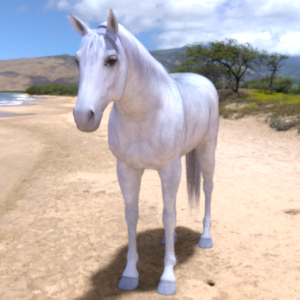

In [29]:
tf.keras.utils.load_img('horse_or_human/horses/horse01-0.png')

In [30]:
batch_size = 8
epochs = 30
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [31]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [32]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory='horse_or_human',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='binary')

Found 822 images belonging to 2 classes.


In [33]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [34]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [35]:
val_data_gen = image_gen_val.flow_from_directory (batch_size=batch_size,
                                                  directory='horse_or_human',
                                                  shuffle=True,
                                                  target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                  subset='validation',
                                                  class_mode='binary')

Found 205 images belonging to 2 classes.


In [36]:
sample_img,label = next(train_data_gen)

In [37]:
sample_img.shape

(8, 224, 224, 3)

In [38]:
label

array([0., 0., 0., 0., 0., 1., 0., 1.], dtype=float32)

In [39]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
filepath = 'my_horseorhuman.h5'

In [42]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [43]:
callbacks = [checkpoint]

In [44]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,verbose=2,callbacks=callbacks)

Epoch 1/30
103/103 - 47s - loss: 0.7143 - accuracy: 0.6618 - val_loss: 0.4188 - val_accuracy: 0.8439

Epoch 00001: val_loss improved from inf to 0.41878, saving model to my_horseorhuman.h5
Epoch 2/30
103/103 - 42s - loss: 0.4652 - accuracy: 0.7725 - val_loss: 0.3450 - val_accuracy: 0.9024

Epoch 00002: val_loss improved from 0.41878 to 0.34499, saving model to my_horseorhuman.h5
Epoch 3/30
103/103 - 37s - loss: 0.3893 - accuracy: 0.8345 - val_loss: 0.3550 - val_accuracy: 0.9268

Epoch 00003: val_loss did not improve from 0.34499
Epoch 4/30
103/103 - 38s - loss: 0.3487 - accuracy: 0.8418 - val_loss: 0.3068 - val_accuracy: 0.9268

Epoch 00004: val_loss improved from 0.34499 to 0.30682, saving model to my_horseorhuman.h5
Epoch 5/30
103/103 - 37s - loss: 0.3034 - accuracy: 0.8710 - val_loss: 0.1471 - val_accuracy: 0.9610

Epoch 00005: val_loss improved from 0.30682 to 0.14712, saving model to my_horseorhuman.h5
Epoch 6/30
103/103 - 36s - loss: 0.2443 - accuracy: 0.8978 - val_loss: 0.1556 -

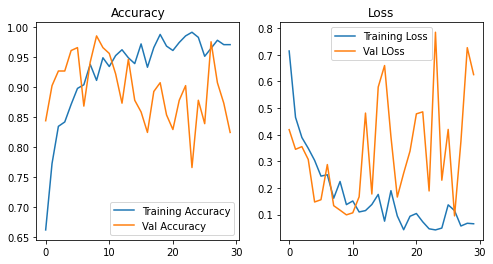

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc=0)
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [46]:
import tensorflow as tf

In [47]:
model = tf.keras.models.load_model('my_horseorhuman.h5')

In [48]:
img = load_img('testimage.png',target_size=(224,224))

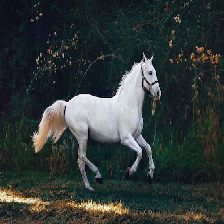

In [49]:
img

In [50]:
img_array = img_to_array(img)
img_array.shape

(224, 224, 3)

In [51]:
img_array = img_array.reshape(1,224, 224, 3)

In [52]:
img_array.shape

(1, 224, 224, 3)

In [53]:
class_name = ['horse_names', 'human_names']

In [54]:
model.predict(img_array)

array([[1.]], dtype=float32)

In [55]:
np.argmax(model.predict(img_array),axis=1)

array([0], dtype=int64)

In [56]:
np.argmax(model.predict(img_array),axis=1)[0]

0

In [57]:
class_name[np.argmax(model.predict(img_array),axis=1)[0]]

'horse_names'